In [500]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [501]:
#Using data from the hosted location
df = pd.read_excel("https://archive.org/download/concrete-data/Concrete_Data.xlsx")
df.head()

,cement_component,blast_furnace_slag,fly_ash_component,water_component,superplasticizer,coarse_agg_component,fine_agg_component,age,concrete_compressive_strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075


In [502]:
df.describe()

,cement_component,blast_furnace_slag,fly_ash_component,water_component,superplasticizer,coarse_agg_component,fine_agg_component,age,concrete_compressive_strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.165631,73.895485,54.187136,181.566359,6.203112,972.918592,773.578883,45.662136,35.817836
std,104.507142,86.279104,63.996469,21.355567,5.973492,77.753818,80.175427,63.169912,16.705679
min,102.000000,0.000000,0.000000,121.750000,0.000000,801.000000,594.000000,1.000000,2.331808
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.707115
50%,272.900000,22.000000,0.000000,185.000000,6.350000,968.000000,779.510000,28.000000,34.442774
75%,350.000000,142.950000,118.270000,192.000000,10.160000,1029.400000,824.000000,56.000000,46.136287
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.599225


In [503]:
#df = (df - df.mean()) / df.std()
#df

In [504]:
#Constructing heatmap on the dataset
correlation_matrix = df.corr().round(2)

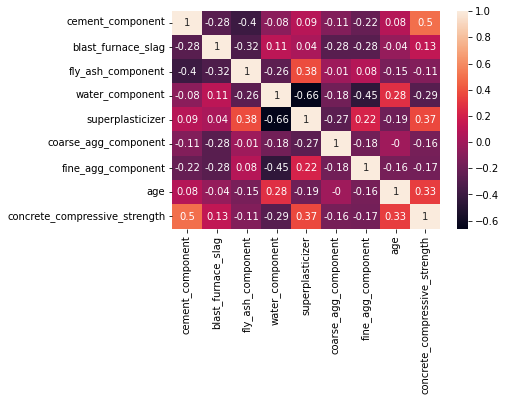

In [505]:
sb.heatmap(data=correlation_matrix, annot=True)

Thus, we see that the 'cement_component' feature is contributing the most towards the output variable 'concrete_compressive_strength'.

In [506]:
#Preprocessing the data set - checking null values
df.isnull().sum()

cement_component                 0
blast_furnace_slag               0
fly_ash_component                0
water_component                  0
superplasticizer                 0
coarse_agg_component             0
fine_agg_component               0
age                              0
concrete_compressive_strength    0
dtype: int64

In [507]:
class LinearRegression():

  def __init__(self):
    self.theta = None;
    pass


  def pre_processing(self, df):
      df = df.dropna()
      df = df.drop_duplicates()
      return df

  def split_X_and_y(self, df):
    no_rows, no_cols = df.shape[0], df.shape[1]
    X =  df.iloc[:, 0:(no_cols -1)]
    y = df.iloc[:, no_cols-1]

    return X,y

  def scale_data(self, df):
    #ss = StandardScaler()
    #return pd.DataFrame(ss.fit_transform(df), columns = df.columns)
    return (df - df.mean()) / df.std()
    #return df

  def split_train_test(self, X, y):
    return train_test_split(X, y, test_size = 0.2, random_state=5)

  def get_vectorX(self, X):
    return np.c_[np.ones((len(X),1)), X]

  def get_vectorY(self, y):
    return np.reshape(y.values,(-1,1))

  def get_initial_weights(self, X):
    return np.random.rand(X.shape[1] + 1, 1)

  def multivariate_gradient(self, X, y, theta):
    return 2/len(X)*X.T.dot(X.dot(theta) - y[0])

  def fit_with_grad_desc(self, X, y, epochs, rate):
      self.theta = self.get_initial_weights(X)
      vectorX = self.get_vectorX(X)
      vectorY = np.reshape(y.values,(-1,1)) #self.get_vectorY(y)
      costs = []
      m = len(X)
      for i in range(epochs):
        gradient = self.multivariate_gradient(vectorX, vectorY, self.theta)
        self.theta -= rate*gradient
        y_pred = vectorX.dot(self.theta)
        cost = 1/(2*m)*(vectorY - y_pred)**2
        costs.append(cost.sum())

      return costs, self.theta

      #Aishwarya
      # n_sample = X.shape[0]  #number of samples
      # loss = np.ones(epochs)  #creating unit matrix 
      # ones = np.ones((n_sample,1))  
      # X = np.concatenate((ones, X), axis=1)   #Form the new X with old X and X0's as 1
      # attr = X.shape[1]   
      # self.theta = np.ones(attr)
      # hypo = np.dot(X, self.theta)   
      
      # for i in range (0, epochs):
      #   self.theta[0] = self.theta[0] - (rate / X.shape[0]) * sum(hypo-y) #for theta0,x0
      #   for j in range(1, attr):
      #     self.theta[j]= self.theta[j] - (rate/ X.shape[0]) * sum((hypo-y) * X[:, j])
      #   hypo= np.dot(X, self.theta)
      #   #Now computing loss
      #   loss[i]=1/(n_sample) * sum(np.square(hypo-y))
      # return loss, self.theta

      #Abshishek
      # m = X.shape[0]
      # ones =np.ones((m,1))  
      # X = np.concatenate((ones, X), axis=1)
      # n = X.shape[1]
      # W = np.ones(n)
      # hyp = np.dot(X, W)

      # cost = np.ones(epochs)
      # for i in range (0, epochs):
      #   W[0] = W[0] - (rate / X.shape[0]) * sum(hyp-y)
      #   for j in range(1, n):
      #     W[j]= W[j] - (rate/ X.shape[0]) * sum((hyp-y) * X[:, j])
      #   hyp  = np.dot(X, W)
      #   cost[i] = 1/(2*m)*sum(np.square(hyp-y))

      # self.theta = W
      # return cost, W

  #Predicting on the test dataset    
  def predict(self, X_test):
    n = X_test.shape[0]
    vector_X_test = self.get_vectorX(X_test)
    return vector_X_test.dot(self.theta)

  def evaluate(self, X_test, y_test, y_pred):
    vectorY = self.get_vectorY(y_test)
    mse = 1/2*((vectorY - y_pred)**2).mean()
    return mse

model = LinearRegression()

In [508]:
df = model.pre_processing(df)
df.head()

,cement_component,blast_furnace_slag,fly_ash_component,water_component,superplasticizer,coarse_agg_component,fine_agg_component,age,concrete_compressive_strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075


Here we do not have any categorical variables in the data, so we do not need to convert it.

In [509]:
X, y = model.split_X_and_y(df)

We would want to scale the data to normalize the deviations.

In [510]:
X = X.iloc[:, [0,3,4,7]]
X

,cement_component,water_component,superplasticizer,age
0,540.0,162.0,2.5,28
1,540.0,162.0,2.5,28
2,332.5,228.0,0.0,270
3,332.5,228.0,0.0,365
4,198.6,192.0,0.0,360
...,...,...,...,...
1025,276.4,179.6,8.9,28
1026,322.2,196.0,10.4,28
1027,148.5,192.7,6.1,28
1028,159.1,175.6,11.3,28


In [511]:
X_train, X_test, y_train, y_test = model.split_train_test(X, y)
print("X_train shape: ", X_train.shape)
print("y_train shape: ", y_train.shape)
print("X_test shape: ", X_test.shape)
print("y_test shape: ", y_test.shape)

X_train shape:  (804, 4)
y_train shape:  (804,)
X_test shape:  (201, 4)
y_test shape:  (201,)


In [512]:
scaled_X = model.scale_data(X_train)
scaled_X.shape

(804, 4)

In [513]:
costs, theta = model.fit_with_grad_desc(scaled_X, y_train, 500, 0.01)

In [514]:
print("Minimum cost:", min(costs))
print("Final weights:", theta)

Minimum cost: 135.56965680957026
Final weights: [[ 3.66372593e+01]
 [ 2.03243054e-04]
 [ 1.72332398e-02]
 [ 1.62724038e-02]
 [-2.59788320e-03]]


Text(0, 0.5, 'Cost')

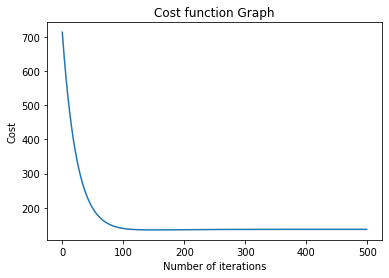

In [515]:
plt.plot(costs)
plt.title('Cost function Graph')
plt.xlabel('Number of iterations')
plt.ylabel('Cost')

## Predicting on test dataset

We also need to scale the test data set in accordance to the train data.


In [516]:
X_test = model.scale_data(X_test)

In [517]:
y_pred = model.predict(X_test)
print(y_test.shape)

(201,)


In [518]:
mse = model.evaluate(X_test, y_test, y_pred)
print(mse)

118.06678336537739


weights:  [-1.65887228e+10  1.55297969e+11  8.03457003e+10  1.47258631e+11]


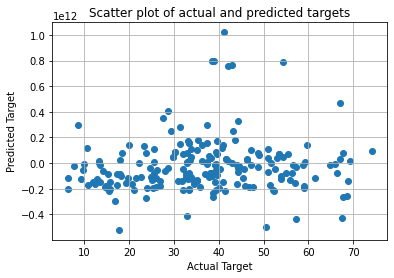

Mean Squared Error: 4.493987435046903e+22


In [519]:
#Testing on a pre-defined function: from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_squared_error
n_iter=2000
sgdtrain = SGDRegressor(max_iter=n_iter)
sgdtrain.fit(X_train, y_train)
print("weights: ", sgdtrain.coef_)
y_prediction = sgdtrain.predict(X_test)
plt.scatter(y_test,y_prediction)
plt.grid()
plt.xlabel('Actual Target')
plt.ylabel('Predicted Target')
plt.title('Scatter plot of actual and predicted targets')
plt.show()
print('Mean Squared Error:',mean_squared_error(y_test, y_prediction))

In [520]:
theta


array([[ 3.66372593e+01],
       [ 2.03243054e-04],
       [ 1.72332398e-02],
       [ 1.62724038e-02],
       [-2.59788320e-03]])

In [521]:
#import numpy
#corr_matrix = numpy.corrcoef(y_test[0], y_pred[0])  
#corr = corr_matrix[0,1]
#R_sq = corr**2
 
#print(R_sq)